# Data Mining in Physics - Presentation 2. - DAGUR 5.1: Fitting a line to data

In [2]:
library(microbenchmark)
library(graphics)
library(ggplot2)

In [3]:
options(jupyter.plot_scale=1.4)

## 1. Basics of linear fitting

In [4]:
library(lattice)
library(DAAG)

In [5]:
# Export the `roller` dataset from DAAG
df = DAAG::roller
# Extract X and y data
x = df$weight
y = df$depression

In [6]:
head(df)

,weight,depression
,<dbl>,<dbl>
1,1.9,2
2,3.1,1
3,3.3,5
4,4.8,5
5,5.3,20
6,6.1,20


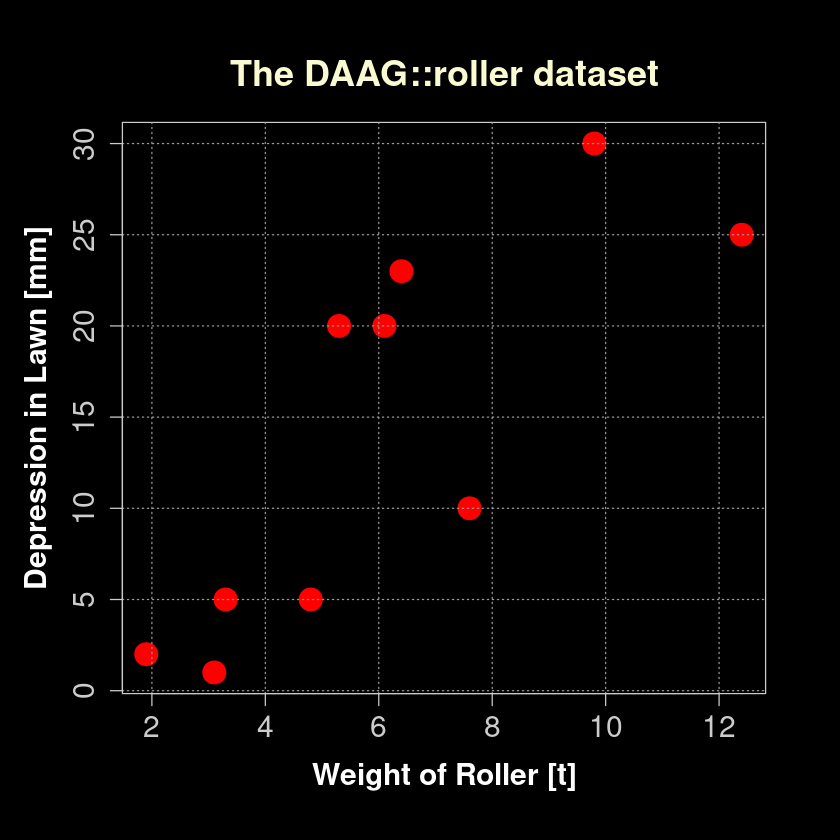

In [7]:
mar = 0.2
par(bg='black', fig=c(0, 1, 0, 1),
    omi=c(mar,mar,mar,mar))

plot(x, y,
     xaxt='n', yaxt='n',
     ann=FALSE, type='n')

box(col=gray(0.8))

points(x, y,
       col='red', lwd=12)

grid(nx=NULL, ny=NULL, lty=3, col=grey(0.6))

axis(1, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)
axis(2, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)

title(main='The DAAG::roller dataset',
      col.main='lightgoldenrodyellow', cex.main=1.8, font.main=2) 
title(xlab='Weight of Roller [t]', ylab='Depression in Lawn [mm]',
      col.lab='white', cex.lab=1.5, font.lab=2)

## 2. Fit a linear modell to the data

In [8]:
# Fit linear model to the weight(depression) values
roller.lm = lm(formula=depression ~ weight, data=df)
# Use the extractor function summary() to summarize results
summary(roller.lm)


Call:
lm(formula = depression ~ weight, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.180 -5.580 -1.346  5.920  8.020 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -2.0871     4.7543  -0.439  0.67227   
weight        2.6667     0.7002   3.808  0.00518 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.735 on 8 degrees of freedom
Multiple R-squared:  0.6445,	Adjusted R-squared:  0.6001 
F-statistic:  14.5 on 1 and 8 DF,  p-value: 0.005175


### 2.1. Plot fitted line

In [9]:
# Extract coefficients of fit
b = roller.lm$coefficients[1]
m = roller.lm$coefficients[2]

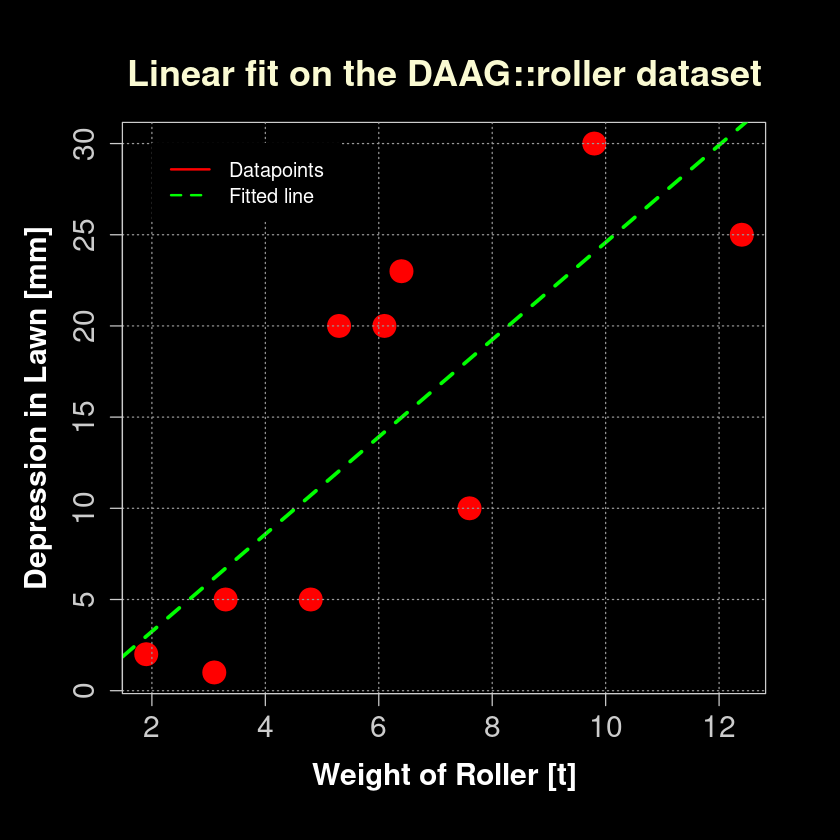

In [10]:
mar = 0.2
par(bg='black', fig=c(0, 1, 0, 1),
    omi=c(mar,mar,mar,mar))

plot(x, y,
     xaxt='n', yaxt='n',
     ann=FALSE, type='n')

box(col=gray(0.8))

points(x, y,
       col='red', lwd=12)
# Fitted line
abline(roller.lm,
       col='green', lty=2, lwd=3)

grid(nx=NULL, ny=NULL, lty=3, col=grey(0.6))

axis(1, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)
axis(2, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)

legend(2, 30, legend=c('Datapoints', 'Fitted line'),
       lty=c(1,2), lwd=c(2,2), 
       col=c('red', 'green'), text.col='white')

title(main='Linear fit on the DAAG::roller dataset',
      col.main='lightgoldenrodyellow', cex.main=1.8, font.main=2) 
title(xlab='Weight of Roller [t]', ylab='Depression in Lawn [mm]',
      col.lab='white', cex.lab=1.5, font.lab=2)

### 2.2. Diagnostic plots

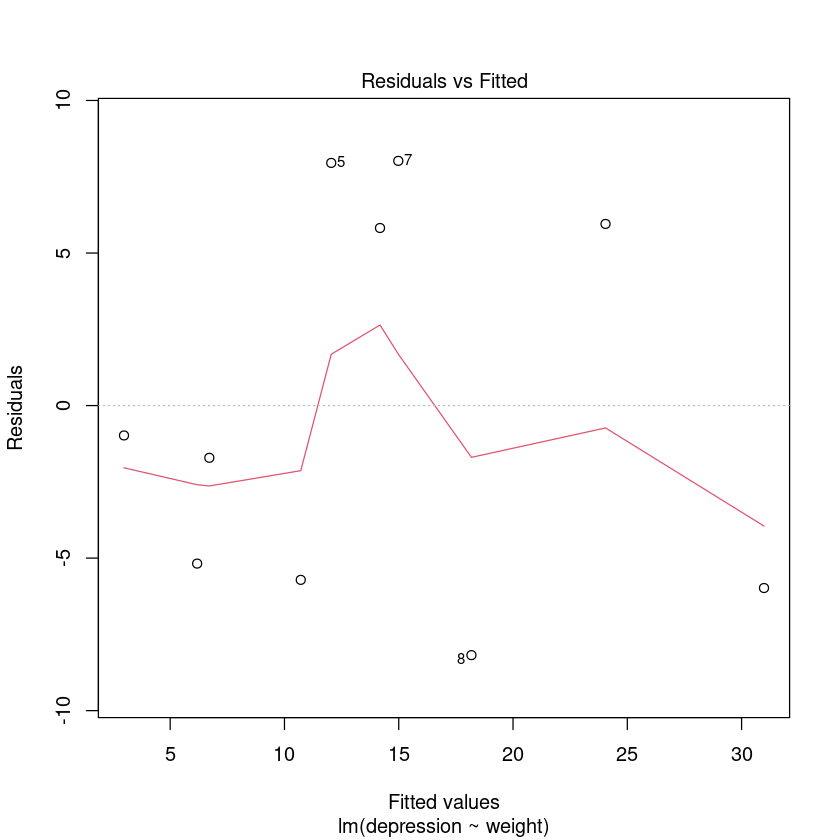

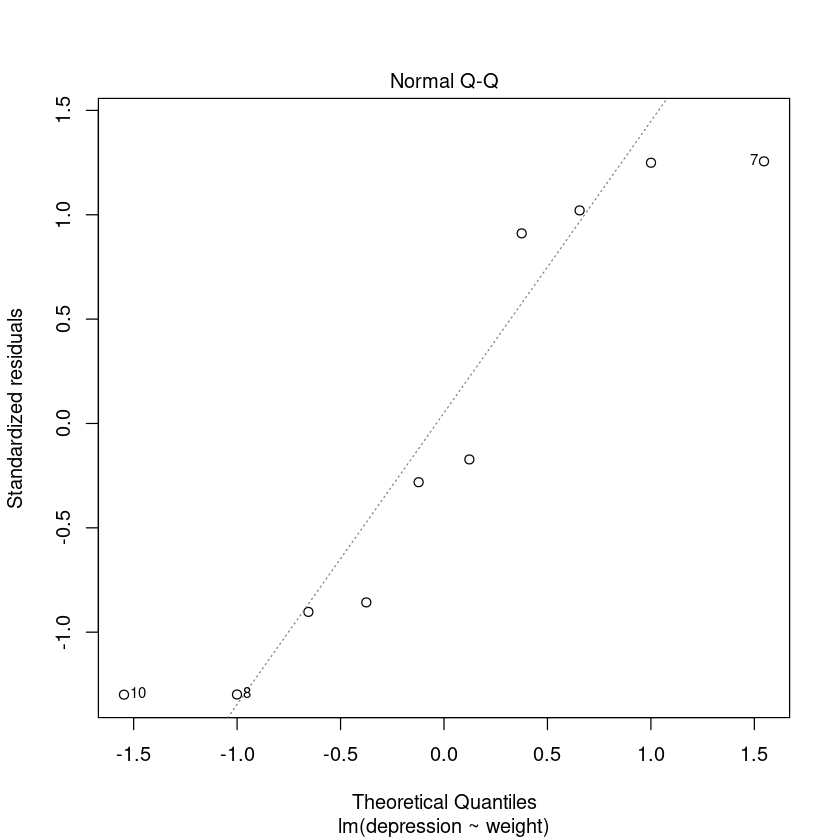

In [11]:
## A: Plot residuals vs fitted values; B: normal probability plot
plot(roller.lm, which = 1:2)

### 2.3. Plot residuals

In [12]:
r = roller.lm$residuals

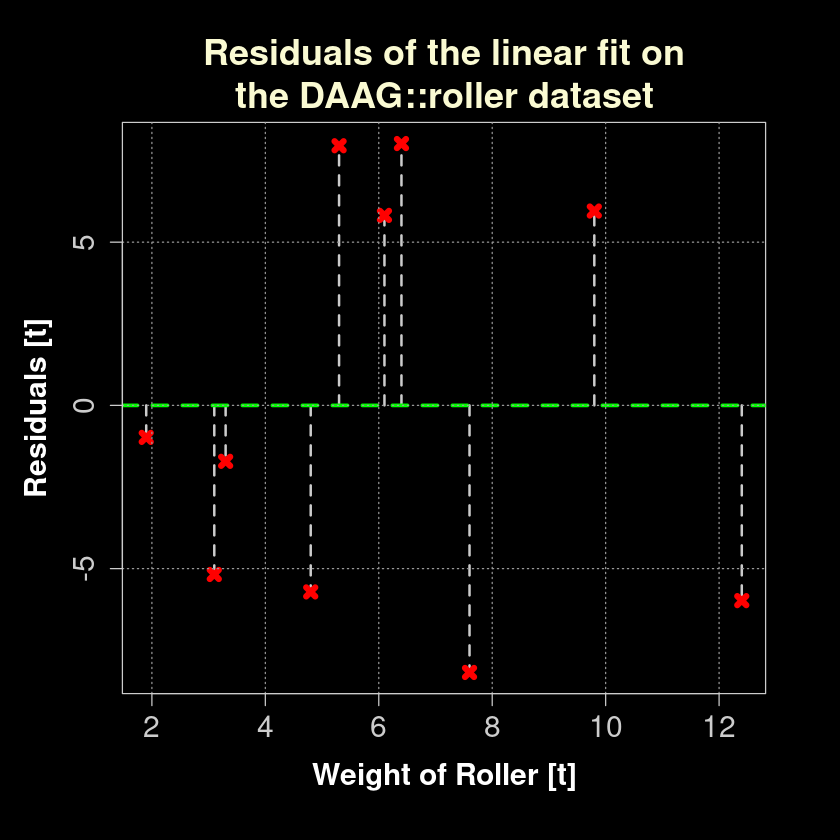

In [13]:
mar = 0.2
par(bg='black', fig=c(0, 1, 0, 1),
    omi=c(mar,mar,mar,mar))

plot(x, r,
     xaxt='n', yaxt='n',
     ann=FALSE, type='n')

for (i in 1:length(roller.lm$residuals)) {
    lines(x=c(x[i], x[i]), y=c(0, r[i]),
          col=gray(0.8), lty=2, lwd=2)
}

box(col=gray(0.8))

points(x, r,
       col='red', pch=4, lwd=5)

abline(h = 0,
       col='green', lty=2, lwd=3)

grid(nx=NULL, ny=NULL, lty=3, col=grey(0.6))

axis(1, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)
axis(2, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)

title(main='Residuals of the linear fit on\nthe DAAG::roller dataset',
      col.main='lightgoldenrodyellow', cex.main=1.8, font.main=2) 
title(xlab='Weight of Roller [t]', ylab='Residuals [t]',
      col.lab='white', cex.lab=1.5, font.lab=2)

## 3. ANOVA table

In [14]:
anov = anova(roller.lm)
anov

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
weight,1,657.9662,657.96622,14.50328,0.005175013
Residuals,8,362.9338,45.36672,NA,NA


#### Calculate $R^{2}$ and adjusted $R^{2}$ (coefficient of determination)

In [16]:
anov$`Sum Sq`[2] / anov$`Sum Sq`[1]

[1] 0.5515994

In [17]:
1 - anov$`Sum Sq`[2] / anov$`Sum Sq`[1]

[1] 0.4484006